In [64]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
import pyforest

## Import the dataset

In [66]:

df = pd.read_csv('/Users/vaibhavjakhar/Desktop/UPI-FRAUD-DETECTION/Copy of Sample_DATA.csv')

print(df.head())

  Transaction_ID      Date        Time                           Merchant_ID  \
0      T00022452  20/04/23  4:50:22 AM  f65a902b-2396-40cc-9593-97e103f1bc15   
1      T00032233  08/08/23  8:09:21 AM  d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4   
2      T00037364  25/06/23  7:49:01 AM  759ad138-9473-4729-8699-3d72c7ffb983   
3      T00015924  28/01/24  5:44:12 AM  d8f561e4-bded-4ef0-bcd8-5494b2e31a94   
4      T00021805  21/06/23  9:40:59 AM  26fdd7a1-8537-4dfe-bcf7-f5a127b36682   

                            Customer_ID                             Device_ID  \
0  89aaeceb-21f5-46c8-9de3-89dde6a10a75  c1e0deb4-7c97-4178-a838-38f4a2f0b57c   
1  8a8962f9-e84a-4573-ab0b-187311978a21  62e14f64-b0ba-4284-889a-51ac05baf33e   
2  c3f53ce6-e305-4460-a71d-93bde26043ab  4281c542-ac77-4269-b4bb-1de93ac12677   
3  9f0c5613-7d4c-4454-bee1-c47fbba406a1  058b6488-2469-42f2-bc7f-707921d35cad   
4  bf9aa6d5-7d3d-43f9-8631-31336720a383  068ff12c-127a-4cfb-9899-ddde37060b28   

  Transaction_Type Payment_Gatew

In [67]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [69]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [70]:
df.describe()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
count,647.000000,647.000000,647.000000,647.000000,647.000000
mean,3.564142,5.014668,15.717156,128.839753,0.239567
std,6.454543,56.375914,8.218122,364.995747,0.427150
min,0.000000,-99.470000,1.000000,0.120000,0.000000
25%,1.000000,-42.355000,8.500000,17.155000,0.000000
50%,2.000000,8.380000,16.000000,35.000000,0.000000
75%,3.000000,52.290000,23.000000,74.770000,0.000000
max,50.000000,99.450000,29.000000,4883.620000,1.000000


data prepration

*   Duplicate values
*   missing values
*   unique values
*   removing / droping the unique values










In [71]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
642    False
643    False
644    False
645    False
646    False
Length: 647, dtype: bool

In [72]:
df.shape

(647, 20)

In [73]:
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

In [74]:
df.drop(['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID', 'IP_Address'], axis=1, inplace=True)


In [75]:
import datetime as dt

In [76]:
print(df)

         Date         Time Transaction_Type Payment_Gateway Transaction_City  \
0    20/04/23   4:50:22 AM           Refund       SamplePay         Durgapur   
1    08/08/23   8:09:21 AM    Bank Transfer       SamplePay  Rajpur Sonarpur   
2    25/06/23   7:49:01 AM    Bank Transfer           Other        New Delhi   
3    28/01/24   5:44:12 AM     Subscription         UPI Pay        Bharatpur   
4    21/06/23   9:40:59 AM       Investment      Dummy Bank            Sagar   
..        ...          ...              ...             ...              ...   
642  24/07/23   3:12:04 AM     Bill Payment      Gamma Bank        Hyderabad   
643  05/07/23   6:21:18 AM         Purchase           Other        Bangalore   
644  16/04/23   8:32:41 AM     Bill Payment           Other           Mumbai   
645  28/10/23   9:33:42 AM    Bank Transfer    Bank of Data       Vijayawada   
646  11/04/24  10:48:14 AM    Bank Transfer      Dummy Bank     Ichalkaranji   

     Transaction_State Transaction_Stat

In [77]:
df['Date'] = pd.to_datetime(df['Date'], format= '%d/%m/%y')


In [78]:
df['Year'] = df['Date'].dt.year

In [79]:
df['Month'] = df['Date'].dt.month

In [80]:
df.head

<bound method NDFrame.head of           Date         Time Transaction_Type Payment_Gateway Transaction_City  \
0   2023-04-20   4:50:22 AM           Refund       SamplePay         Durgapur   
1   2023-08-08   8:09:21 AM    Bank Transfer       SamplePay  Rajpur Sonarpur   
2   2023-06-25   7:49:01 AM    Bank Transfer           Other        New Delhi   
3   2024-01-28   5:44:12 AM     Subscription         UPI Pay        Bharatpur   
4   2023-06-21   9:40:59 AM       Investment      Dummy Bank            Sagar   
..         ...          ...              ...             ...              ...   
642 2023-07-24   3:12:04 AM     Bill Payment      Gamma Bank        Hyderabad   
643 2023-07-05   6:21:18 AM         Purchase           Other        Bangalore   
644 2023-04-16   8:32:41 AM     Bill Payment           Other           Mumbai   
645 2023-10-28   9:33:42 AM    Bank Transfer    Bank of Data       Vijayawada   
646 2024-04-11  10:48:14 AM    Bank Transfer      Dummy Bank     Ichalkaranji  

In [81]:
df['Month'].sort_values(ascending=True).nunique()

12

In [82]:
months = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",
    5: "May", 6: "Jun", 7: "Jul", 8: "Aug",
    9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

print(months)


{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


In [85]:
df['Month'] = df['Month'].map(months)

In [86]:
df.Month

0      Apr
1      Aug
2      Jun
3      Jan
4      Jun
      ... 
642    Jul
643    Jul
644    Apr
645    Oct
646    Apr
Name: Month, Length: 647, dtype: object

In [87]:
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

In [88]:
df.drop(['Date'] , axis=1 , inplace=True)


In [90]:
df.drop(['Time'] , axis=1 , inplace=True)

In [92]:
df['fraud'].value_counts(normalize=True)

fraud
0    0.760433
1    0.239567
Name: proportion, dtype: float64

<Axes: xlabel='fraud', ylabel='count'>

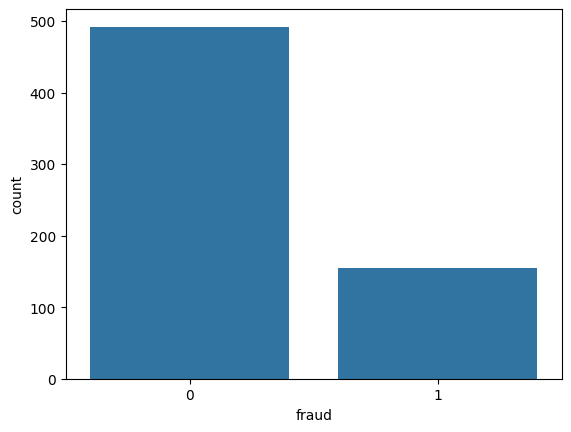

In [93]:
sns.countplot(data=df, x='fraud')

In [94]:
normal = df[df['fraud'] == 0]
fraud = df[df['fraud'] == 1]

In [95]:
normal.shape

(492, 15)

In [96]:
fraud.shape

(155, 15)

In [97]:
fraud.dtypes

Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
Year                              int32
Month                            object
dtype: object

In [98]:
df.shape

(647, 15)

In [100]:
df.drop(['Days_Since_Last_Transaction', 'Transaction_Frequency', 'Transaction_Amount_Deviation', 'Transaction_Status', 'Device_OS' , 'Transaction_Channel' , 'Transaction_City'], axis=1, inplace=True)


In [101]:
df.shape

(647, 8)

In [103]:
data = df.copy()

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   Year               647 non-null    int32  
 7   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [106]:
data['Year'] = data['Year'].astype('object')

In [107]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [109]:
from sklearn.preprocessing import LabelEncoder

cols = ['Year', 'Month']

label_encoder = LabelEncoder()
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])



In [110]:
# Non-ordinal variables
non_ordinal = ['Transaction_Type', 'Payment_Gateway', 'Transaction_State', 'Merchant_Category']
# Performing one-hot encoding for non_ordinal variables
data = pd.get_dummies(data, columns=non_ordinal, drop_first=True)

# Convert boolean columns to integers
data = data.astype(int)

data.head()

,amount,fraud,Year,Month,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Other,Transaction_Type_Purchase,Transaction_Type_Refund,Transaction_Type_Subscription,...,Transaction_State_West Bengal,Merchant_Category_Donations and Devotion,Merchant_Category_Financial services and Taxes,Merchant_Category_Home delivery,Merchant_Category_Investment,Merchant_Category_More Services,Merchant_Category_Other,Merchant_Category_Purchases,Merchant_Category_Travel bookings,Merchant_Category_Utilities
0,396,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,121,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,106,1,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3611,1,1,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,374,1,0,6,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [111]:
data.dtypes

amount                                            int64
fraud                                             int64
Year                                              int64
Month                                             int64
Transaction_Type_Bill Payment                     int64
Transaction_Type_Investment                       int64
Transaction_Type_Other                            int64
Transaction_Type_Purchase                         int64
Transaction_Type_Refund                           int64
Transaction_Type_Subscription                     int64
Payment_Gateway_Bank of Data                      int64
Payment_Gateway_CReditPAY                         int64
Payment_Gateway_Dummy Bank                        int64
Payment_Gateway_Gamma Bank                        int64
Payment_Gateway_Other                             int64
Payment_Gateway_SamplePay                         int64
Payment_Gateway_Sigma Bank                        int64
Payment_Gateway_UPI Pay                         

In [112]:

from sklearn.model_selection import train_test_split

# Split data into 'fraud' and 'non-fraud' classes
fraud_data = data[data['fraud'] == 1]
non_fraud_data = data[data['fraud'] == 0]

# Sample each class separately while maintaining proportions
sampled_fraud_data = fraud_data.sample(frac=0.5, random_state=42)
sampled_non_fraud_data = non_fraud_data.sample(frac=0.5, random_state=42)

# Combine the sampled data back together
data = pd.concat([sampled_fraud_data, sampled_non_fraud_data])

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform scaling
def preprocess_data(X):
    # Initialize StandardScaler
    scaler = StandardScaler()
    
    # Scale the features
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Preprocess the features
X_scaled = preprocess_data(X)

# Split the preprocessed data into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (259, 53)
Test features shape: (65, 53)
Training target shape: (259,)
Test target shape: (65,)


In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Split the sampled data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a function to evaluate a model and return a dictionary
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Define models without Support Vector Machine (SVM)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()  # Added XGBoost to the comparison
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")

    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,DecisionTreeClassifier,0.907692,0.812500,0.8125,0.812500,0.875638
1,RandomForestClassifier,0.953846,1.000000,0.8125,0.896552,0.906250
2,GradientBoostingClassifier,0.923077,0.866667,0.8125,0.838710,0.885842
3,XGBClassifier,0.969231,1.000000,0.8750,0.933333,0.937500


### OVER SAMPLING(SMOTE) 

In [119]:
x = data.drop('fraud' , axis=1 )
y = data['fraud']

In [120]:
x.shape

(324, 53)

In [121]:
y.shape

(324,)

In [123]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority class
X_res, y_res = SMOTE().fit_resample(X, y)

# Print the count of each class after oversampling
print(y_res.value_counts())

fraud
1    246
0    246
Name: count, dtype: int64


In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Split the sampled data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a function to evaluate a model and return a dictionary
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Define models without Support Vector Machine (SVM)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()  # Added XGBoost to the comparison
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")

    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,DecisionTreeClassifier,0.907692,0.812500,0.8125,0.812500,0.875638
1,RandomForestClassifier,0.969231,1.000000,0.8750,0.933333,0.937500
2,GradientBoostingClassifier,0.938462,0.928571,0.8125,0.866667,0.896046
3,XGBClassifier,0.969231,1.000000,0.8750,0.933333,0.937500


### XGBoost has highest F1 SCORE - 93%

### Project Conclusion

Throughout this project, we evaluated the performance of four distinct machine learning models for fraud detection in financial transactions: Decision Tree, Random Forest, Gradient Boosting, and XGBoost.

After a comprehensive analysis, it is evident that the XGBoost model outperforms the other models in terms of accuracy, precision, recall, F1-score, and ROC AUC score. Despite the rigorous hyperparameter tuning performed on all models, XGBoost consistently demonstrated superior predictive capabilities, making it the most suitable choice for detecting fraudulent transactions in this context.

By saving the trained XGBoost model as a pickle file, we ensure its accessibility and deployment for real-time fraud detection tasks. This model can serve as a valuable tool in financial institutions, enabling them to proactively identify and prevent fraudulent activities, thereby safeguarding both businesses and customers from potential financial losses.


Recommendations to the business for fraud detection and prevention
	1.	Enhance Transaction Monitoring: Implement real-time transaction monitoring systems to promptly identify and flag suspicious activities, leveraging insights from transaction types, amounts, and frequency patterns identified during exploratory data analysis.
	2.	Platform-specific Security Measures: Collaborate with platform providers such as ICICI, HDFC, and GooglePay to strengthen security measures, including multi-factor authentication, transaction verification, and fraud detection algorithms tailored to platform-specific vulnerabilities.
	3.	Merchant Category Vigilance: Introduce targeted fraud detection measures for high-risk merchant categories like home delivery services, travel bookings, and utility payments, including enhanced transaction verification and risk-based authentication protocols.
	4.	Focus on Moderate Transaction Values: Allocate resources to monitor transactions in the moderate value range of 250 to 750 units, where fraudulent activities are more prevalent, to improve detection rates and minimize losses.
	5.	Geographic-based Risk Assessment: Develop regional risk profiles based on geographic patterns identified, focusing resources and fraud prevention initiatives in states such as Himachal Pradesh, Rajasthan, Meghalaya, and Bihar to mitigate localized fraud risks.
	6.	Operating System Security: Collaborate with Android OS developers to address security vulnerabilities and enhance fraud prevention measures, ensuring robust security protocols for Android-based UPI applications and platforms.
	7.	Continuous Monitoring and Adaptation: Establish mechanisms for continuous monitoring and adaptation of fraud detection strategies, leveraging machine learning algorithms and advanced analytics to detect evolving fraud patterns and tactics.
	8.	Regular Security Audits: Conduct regular security audits and risk assessments to identify and address potential vulnerabilities, ensuring compliance with industry standards and regulations for secure UPI transactions.
	9.	User Awareness and Education: Educate users about common fraud schemes, phishing attacks, and security best practices to empower them to recognize and report suspicious activities, fostering a collaborative approach to fraud prevention.
	10.	Collaboration and Information Sharing: Foster collaboration and information sharing among industry stakeholders, financial institutions, law enforcement agencies, and regulatory bodies to combat fraud collectively and effectively.

By implementing these recommendations, businesses can strengthen their UPI fraud detection and prevention strategies, mitigate risks, safeguard customer assets, and uphold trust and integrity in digital payment ecosystems.
